In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import random

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

# Load Dataset

In [5]:
mnist=tf.keras.datasets.mnist

In [6]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train=x_train/255
x_test=x_test/255

# Define model

In [11]:
model=Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


# Train The Model

In [12]:
 model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [13]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7499 - loss: 1.0018 - val_accuracy: 0.9046 - val_loss: 0.3513
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9049 - loss: 0.3462 - val_accuracy: 0.9201 - val_loss: 0.2868
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9197 - loss: 0.2885 - val_accuracy: 0.9285 - val_loss: 0.2544
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9307 - loss: 0.2505 - val_accuracy: 0.9364 - val_loss: 0.2283
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9371 - loss: 0.2257 - val_accuracy: 0.9394 - val_loss: 0.2105
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9393 - loss: 0.2161 - val_accuracy: 0.9437 - val_loss: 0.1969
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9476 - loss: 0.1930 - val_accuracy: 0.9475 - val_loss: 0.1834
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9510 - loss: 0.1765 - 

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,532 (795.05 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Model Evaluation

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Accuracy:%.3f" %test_acc)
print("Loss:%.3f" %test_loss)

# print("Loss=%.3f"%test_loss)
# print("Accuracy=%.3f"%test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9480 - loss: 0.1799
Accuracy:0.957
Loss:0.153


In [16]:
import random

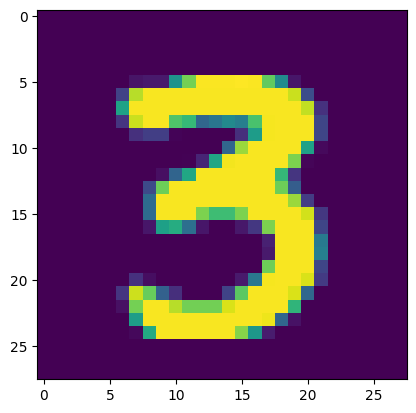

In [17]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


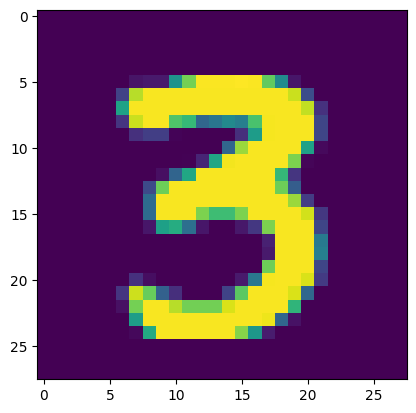

Predicted value= [3.7609759e-08 9.8887964e-09 1.5739937e-06 9.9992394e-01 3.3800408e-08
 2.2315809e-05 9.5567703e-12 2.6188809e-07 3.9325801e-05 1.2458116e-05]
Predicted value= 3


In [18]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print("Predicted value=",predicted_value[n])
print("Predicted value=",np.argmax(predicted_value[n]))

# plot training loss and accuracy 

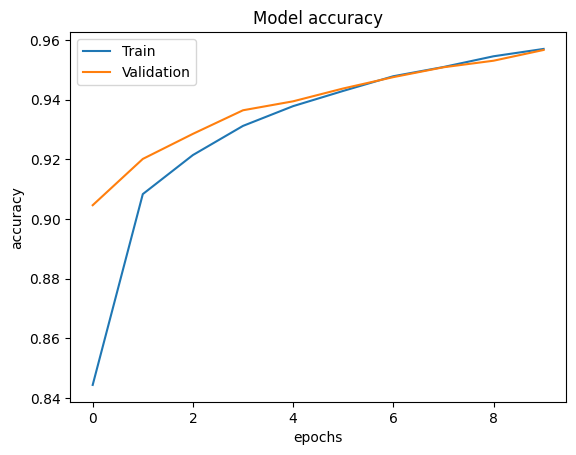

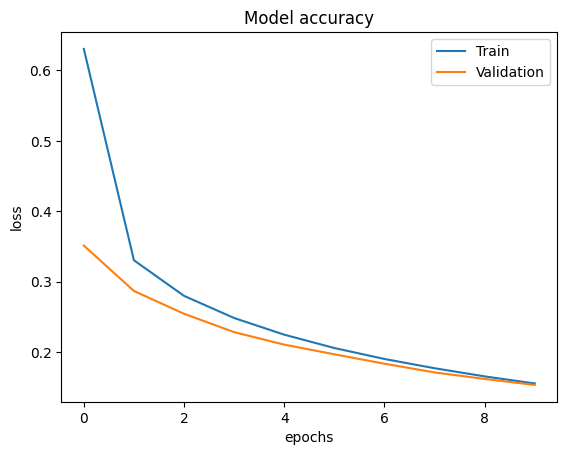

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'])
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Validation'])
plt.show()